# Netflix Stock Price Analysis – Data Visualization Portfolio

In this project, we explore Netflix's stock performance through a variety of data visualizations. Our goal is to uncover trends, assess risks, and examine how Netflix's stock relates to major market indices and its competitors.


Using historical daily and monthly stock data for Netflix, We aim to answer the following:

- What overall trends can we observe in Netflix's stock price?
- How can we visualize and better understand the volatility of Netflix's stock?
- How frequently did Netflix surpass analyst EPS (earnings per share) estimates during earnings reports?
- Are there notable patterns between Netflix's stock movements and those of major US indices like the Dow Jones, S&P 500, or Nasdaq?
- Can we spot potential trading opportunities by comparing Netflix's stock price to those of competitors such as Disney and Spotify?


### Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Load and Inspect Data

The datasets containing the historical stock data for select companies and major indices between 2020 and 2022 are located in the `datasets` folder.

For example, the CSV files that contain the daily and monthly stock prices for Netflix have the filenames:
- `'NFLX_daily_prices.csv'`
- `'NFLX_monthly_prices.csv'`

Let's load and inspect the historical daily prices for Netflix.

In [2]:
netflix_daily_df = pd.read_csv('datasets/NFLX_daily_prices.csv')
print(netflix_daily_df.info())
netflix_daily_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              756 non-null    object 
 1   Open              756 non-null    float64
 2   High              756 non-null    float64
 3   Low               756 non-null    float64
 4   Close             756 non-null    float64
 5   Daily Pct Return  756 non-null    float64
dtypes: float64(5), object(1)
memory usage: 35.6+ KB
None


,Date,Open,High,Low,Close,Daily Pct Return
0,2020-01-02,326.100006,329.980011,324.779999,329.809998,1.928482
1,2020-01-03,326.779999,329.859985,325.529999,325.899994,-1.185532
2,2020-01-06,323.119995,336.359985,321.200012,335.829987,3.046945
3,2020-01-07,336.470001,336.700012,330.299988,330.750000,-1.512666
4,2020-01-08,331.489990,342.700012,331.049988,339.260010,2.572943


Quick summary and initial observations:
- We have `Open`, `High`, `Low`, and `Close` (OHLC) price data for the past 756 trading days (rows) from 2020-01-02 to 2022-12-30
- The `Daily Pct Return` column is the percent change from the previous trading day's *closing* price to the next trading day's *closing* price

In [3]:
netflix_monthly_df = pd.read_csv('datasets/NFLX_monthly_prices.csv')
print(netflix_monthly_df.info())
netflix_monthly_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                36 non-null     object 
 1   Open                36 non-null     float64
 2   High                36 non-null     float64
 3   Low                 36 non-null     float64
 4   Close               36 non-null     float64
 5   Monthly Pct Return  36 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.8+ KB
None


,Date,Open,High,Low,Close,Monthly Pct Return
0,2020-01-31,326.100006,359.850006,321.200012,345.089996,6.650798
1,2020-02-29,347.239990,392.950012,346.279999,369.029999,6.937321
2,2020-03-31,373.109985,393.519989,290.250000,375.500000,1.753245
3,2020-04-30,376.049988,449.519989,357.510010,419.850006,11.810920
4,2020-05-31,415.100006,458.970001,397.859985,419.730011,-0.028580


Quick summary and initial observations:
- We have `Open`, `High`, `Low`, and `Close` (OHLC) price data for the past 36 months from 2020-01 to 2022-12.
- The `Monthly Pct Return` column is the percent change from the previous month's *closing* price to the next month's *closing* price

### Data Cleaning + Preparation

Before we can begin to answer our data questions, we'll need to clean and prepare the datasets to more effectively analyze and visualize the stock data.

Since we're working with multiple datasets that seemingly have the same format, let's define a single function that cleans and prepares them by:
- **renaming** the column `Close` to `Price`, since we'll use closing values as our default price
- **rounding** all of the float columns (the OHLC prices and % return columns) to 2 decimal places which is the most common format for stock prices

In [4]:
def clean_stock_data(df):
    df = df.rename({'Close':'Price'}, axis=1)

    for column in df.columns:
        if df[column].dtype == 'float64':
            df[column] = df[column].round(2)

    return df

In [5]:
# Clean daily prices for Netflix
netflix_daily_cleaned = clean_stock_data(netflix_daily_df)
netflix_daily_cleaned.head()

,Date,Open,High,Low,Price,Daily Pct Return
0,2020-01-02,326.10,329.98,324.78,329.81,1.93
1,2020-01-03,326.78,329.86,325.53,325.90,-1.19
2,2020-01-06,323.12,336.36,321.20,335.83,3.05
3,2020-01-07,336.47,336.70,330.30,330.75,-1.51
4,2020-01-08,331.49,342.70,331.05,339.26,2.57


In [6]:
# Clean monthly prices for Netflix
netflix_monthly_cleaned = clean_stock_data(netflix_monthly_df)
netflix_monthly_cleaned.head()

,Date,Open,High,Low,Price,Monthly Pct Return
0,2020-01-31,326.10,359.85,321.20,345.09,6.65
1,2020-02-29,347.24,392.95,346.28,369.03,6.94
2,2020-03-31,373.11,393.52,290.25,375.50,1.75
3,2020-04-30,376.05,449.52,357.51,419.85,11.81
4,2020-05-31,415.10,458.97,397.86,419.73,-0.03


Now that we've cleaned the data, let's create the following columns that will be useful for analysis and visualization:
- `Year` contains the year of each data point
- `Month` contains the month of each data point
- `Month-Year` containing both the month and year of each data point

Let's create the columns by defining another function that can be applied to each dataset as needed.

In [7]:
def get_year_month(cleaned_df):
    # Use pandas .str.split() method to extract the Year and Month in the Date column
    cleaned_df['Year'] = cleaned_df['Date'].str.split('-', expand=True)[0]
    cleaned_df['Month'] = cleaned_df['Date'].str.split('-', expand=True)[1]
    cleaned_df['Month-Year'] = cleaned_df['Month'].str.cat(cleaned_df['Year'], sep='-')

    return cleaned_df

In [8]:
# Create columns for the daily data
netflix_daily_cleaned = get_year_month(netflix_daily_cleaned)
netflix_daily_cleaned.head()

,Date,Open,High,Low,Price,Daily Pct Return,Year,Month,Month-Year
0,2020-01-02,326.10,329.98,324.78,329.81,1.93,2020,01,01-2020
1,2020-01-03,326.78,329.86,325.53,325.90,-1.19,2020,01,01-2020
2,2020-01-06,323.12,336.36,321.20,335.83,3.05,2020,01,01-2020
3,2020-01-07,336.47,336.70,330.30,330.75,-1.51,2020,01,01-2020
4,2020-01-08,331.49,342.70,331.05,339.26,2.57,2020,01,01-2020


In [9]:
# Create columns for the monthly data
netflix_monthly_cleaned = get_year_month(netflix_monthly_cleaned)
netflix_monthly_cleaned.head()

,Date,Open,High,Low,Price,Monthly Pct Return,Year,Month,Month-Year
0,2020-01-31,326.10,359.85,321.20,345.09,6.65,2020,01,01-2020
1,2020-02-29,347.24,392.95,346.28,369.03,6.94,2020,02,02-2020
2,2020-03-31,373.11,393.52,290.25,375.50,1.75,2020,03,03-2020
3,2020-04-30,376.05,449.52,357.51,419.85,11.81,2020,04,04-2020
4,2020-05-31,415.10,458.97,397.86,419.73,-0.03,2020,05,05-2020


Note: We'll use the **clean_stock_data()** and **get_year_month()** functions to quickly clean and pre-process the other datasets later on in this analysis.

## Data Visualizations

### What has been the general trend of Netflix's stock price?

One way to answer this question is to visualize the full historical data we have for Netflix from 2020 to 2022. 

Spotting trends using daily prices can be challenging. There's increased noise in the data from short-term price fluctuations, and increased noise in the visualization due to overloading issues such as overlapping labels. Therefore, visualizing monthly prices will provide a clearer overview of the general trend of Netflix's stock price over longer periods. 

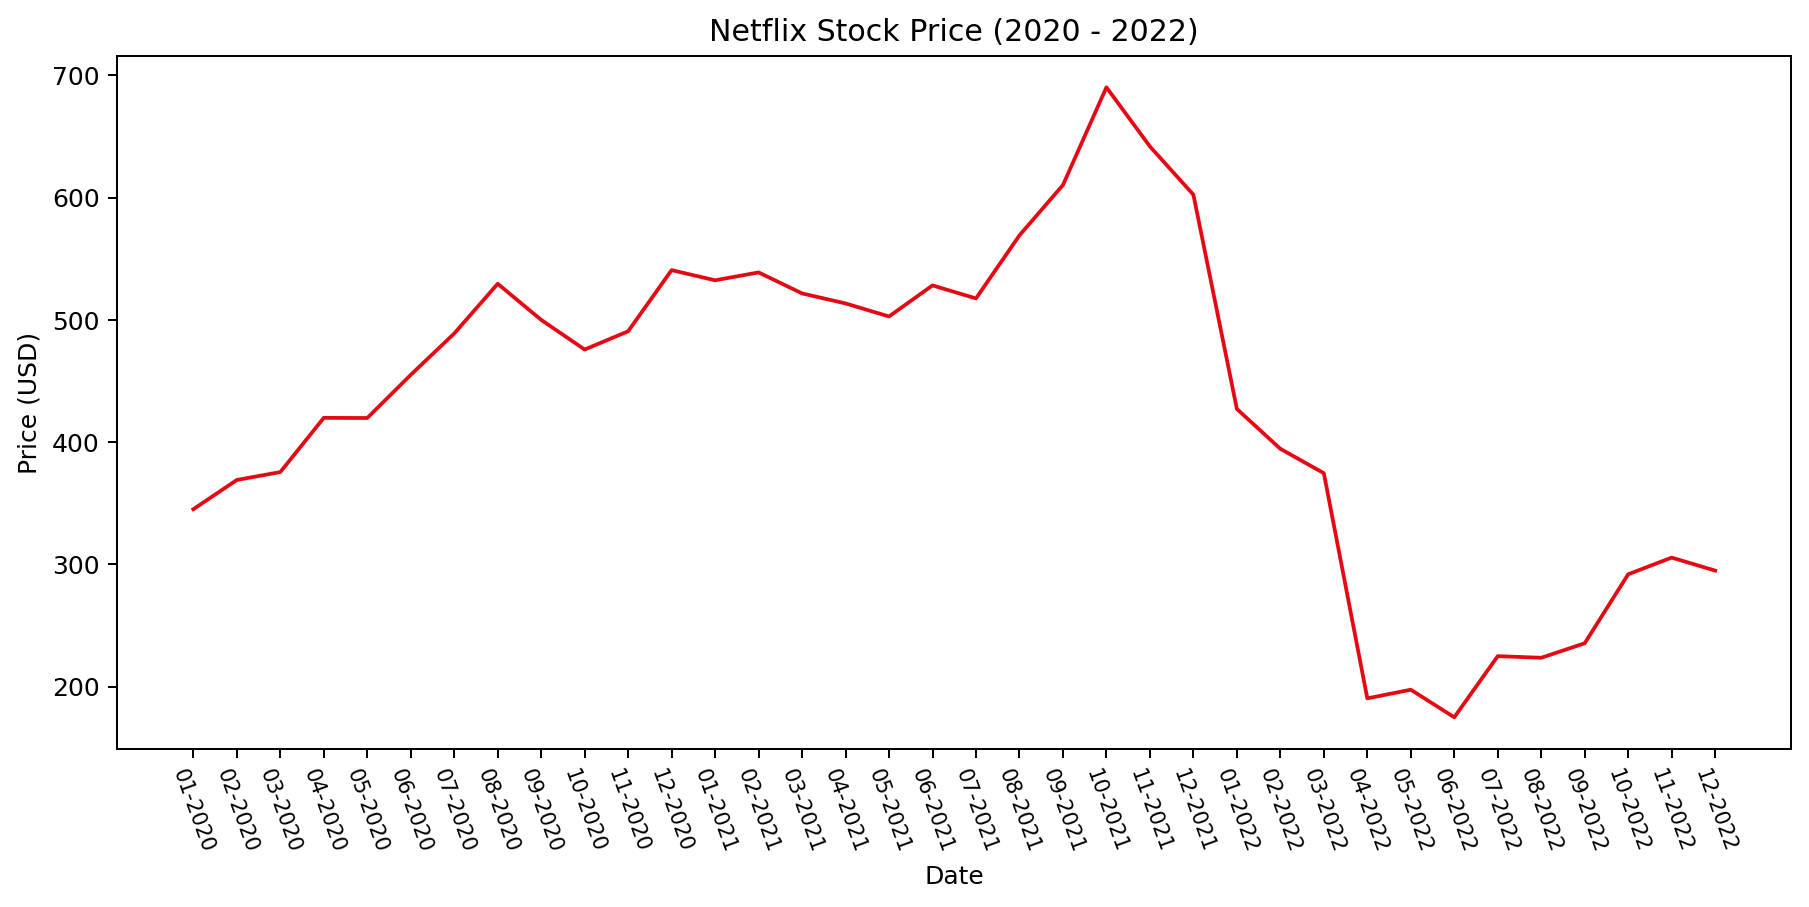

In [10]:
plt.figure(figsize=(12, 5), dpi=180)
plt.title('Netflix Stock Price (2020 - 2022)')
plt.plot(netflix_monthly_cleaned['Month-Year'], netflix_monthly_cleaned['Price'], color="#E50914")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.tick_params(axis='x', labelsize='small',  labelrotation=-70)
plt.show()

Let's identify some monthly trends:
- Starting from January 2020, there was a bullish uptrend from \\$345.09 that peaked in October 2021 at \\$690.31 (about a 100% increase!)
- There was a steep bearish (downward) decline off that high through June 2022 to a low of \\$174.87 (about a -75% decrease!)
- From that low, it looks like Netflix is attempting to rebound and ended the year (and our dataset) at a closing price of \\$294.88.

### How can we visualize the price volatility to gain insight into expected fluctuations?

To answer this question, we'll take a look at the daily, monthly, and yearly returns for Netflix's stock. Specifically, we'll be calculating and visualizing descriptive statistics of the percent returns across different trading periods. 

The mean percent return will give us insight into the average movement we can expect from Netflix over a certain trading period. The standard deviation will give us an idea of the expected fluctuations around the mean. 

However, it is important to note that the mean and standard deviation *do not fully capture the volatility of a stock*. While they give us a sense of what values to expect on average and their expected variation, volatility is a technical indicator that is influenced by other technical and fundamental factors.  

In [11]:
# Compute descriptive statistics of the daily percent returns
netflix_daily_cleaned['Daily Pct Return'].describe()

count    756.000000
mean       0.043783
std        3.265279
min      -35.120000
25%       -1.482500
50%        0.000000
75%        1.532500
max       16.850000
Name: Daily Pct Return, dtype: float64

We see that from 2020 to 2022, the daily percent return for Netflix is about 0.044% on average, which tells us that the stock tends to gain value (in small increments) over time. The standard deviation of 3.27% tells us the deviation or fluctuation from the mean. We can compare these statistics with other stocks to determine if Netflix stock is more or less volatile than others. 

Interestingly, we see that the most significant drop in a single trading day was -35.12%, and the most significant increase was +16.85%. 

Let's now visualize the distribution of daily percent returns for Netflix stock.

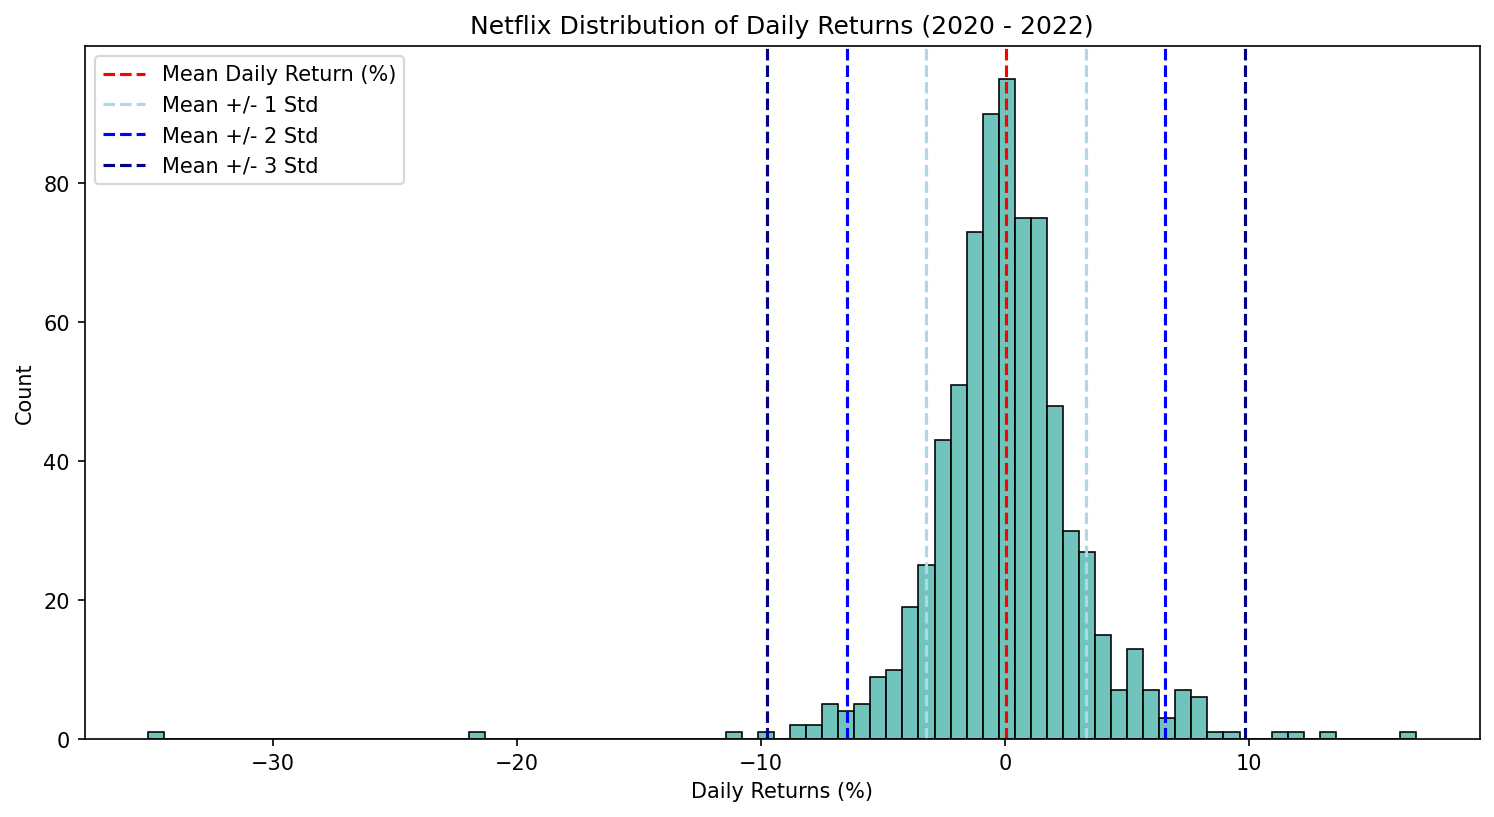

In [12]:
plt.figure(figsize=(12, 6), dpi=150)

# Plot distribution of daily pct returns
axplot = sns.histplot(data=netflix_daily_cleaned, x='Daily Pct Return', color='#40B0A6')
axplot.set(title="Netflix Distribution of Daily Returns (2020 - 2022)", xlabel="Daily Returns (%)", ylabel="Count")

# Plot the mean daily pct return
mean_daily_pct = netflix_daily_cleaned['Daily Pct Return'].mean()
axplot.axline((mean_daily_pct, 0), (mean_daily_pct, 1), color='red', linestyle='--', label='Mean Daily Return (%)')

# Plot the daily pct return +/- 1, 2, 3 standard deviations
std = netflix_daily_cleaned['Daily Pct Return'].std()

# +/- 1 standard deviations from the mean
axplot.axline((mean_daily_pct + std, 0), (mean_daily_pct + std, 1), color='lightblue', linestyle='--', label='Mean +/- 1 Std')
axplot.axline((mean_daily_pct - std, 0), (mean_daily_pct - std, 1), color='lightblue', linestyle='--')

# +/- 2 standard deviations from the mean
axplot.axline((mean_daily_pct + (2*std), 0), (mean_daily_pct + (2*std), 1), color='blue', linestyle='--', label='Mean +/- 2 Std')
axplot.axline((mean_daily_pct - (2*std), 0), (mean_daily_pct - (2*std), 1), color='blue', linestyle='--')

# +/- 3 standard deviations from the mean
axplot.axline((mean_daily_pct + (3*std), 0), (mean_daily_pct + (3*std), 1), color='darkblue', linestyle='--', label='Mean +/- 3 Std')
axplot.axline((mean_daily_pct - (3*std), 0), (mean_daily_pct - (3*std), 1), color='darkblue', linestyle='--')

plt.legend()
plt.show()

The histogram distribution gives us a sense of Netflix's daily returns in percentages. We see that the distribution is relatively symmetric around the mean of 0.044%, which is plotted as a dashed red line.

The 1st, 2nd, and 3rd standard deviations are also plotted to help visualize the spread of the daily returns. Interestingly, we see that there are some significant outliers beyond +/- 3 standard deviations from the mean.

Note that based on this visualization, we might mistakenly assume that the stock returns follow a normal distribution, since the distribution looks bell-shaped. However, it is well-known in finance that returns are **not** normally distributed due to differences in characteristics such as fatter tails, skewness, and kurtosis.

Let's now use boxplots to visualize the daily returns by month for each year to see if there are any month-to-month trends in volatility.

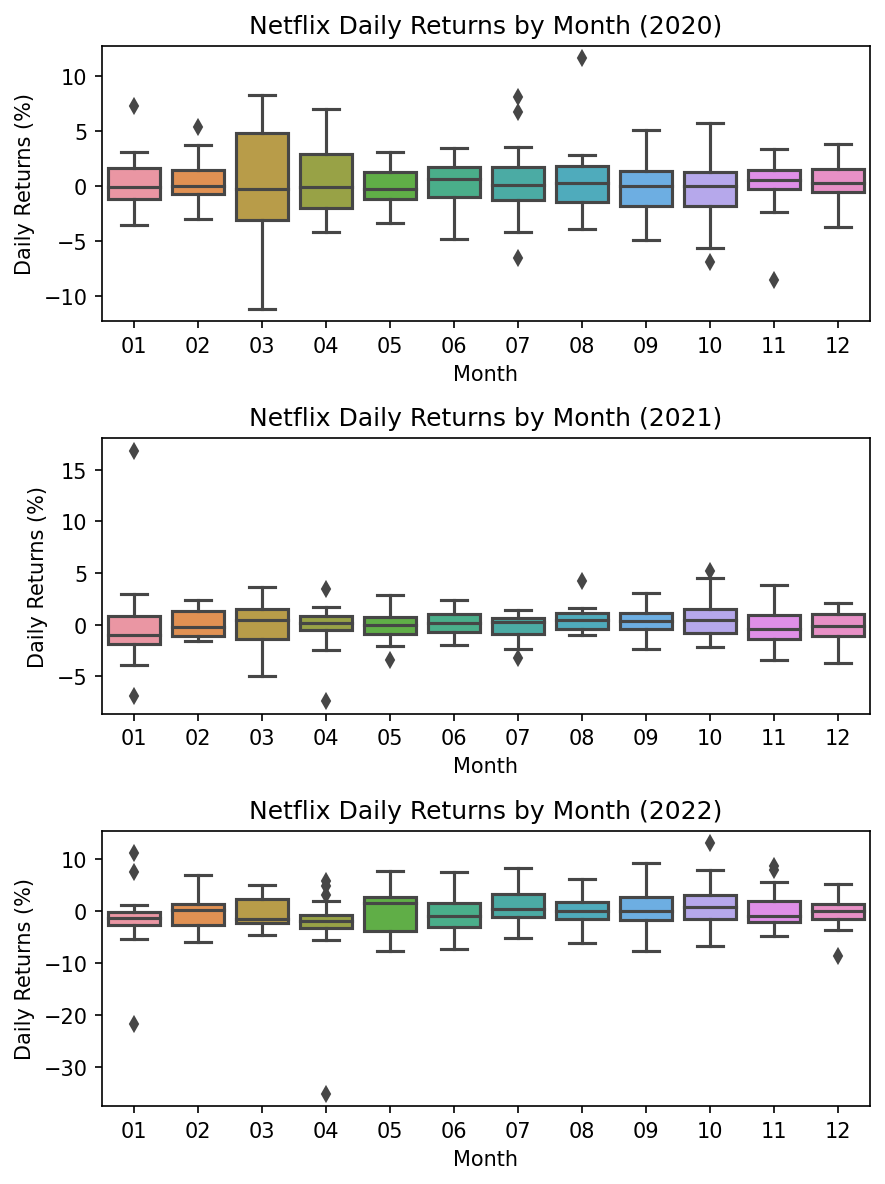

In [13]:
plt.figure(figsize=(6, 8), tight_layout=True, dpi=150)

ax1 = plt.subplot(3, 1, 1)
sns.boxplot(x='Month', y='Daily Pct Return', data=netflix_daily_cleaned[netflix_daily_cleaned['Year']=='2020'])
ax1.set(title="Netflix Daily Returns by Month (2020)", xlabel="Month", ylabel="Daily Returns (%)")

ax2 = plt.subplot(3, 1, 2)
sns.boxplot(x='Month', y='Daily Pct Return', data=netflix_daily_cleaned[netflix_daily_cleaned['Year']=='2021'])
ax2.set(title="Netflix Daily Returns by Month (2021)", xlabel="Month", ylabel="Daily Returns (%)")

ax3 = plt.subplot(3, 1, 3)
sns.boxplot(x='Month', y='Daily Pct Return', data=netflix_daily_cleaned[netflix_daily_cleaned['Year']=='2022'])
ax3.set(title="Netflix Daily Returns by Month (2022)", xlabel="Month", ylabel="Daily Returns (%)")

plt.show()

In March 2020, Netflix experienced its most volatile month (from our dataset) where it dropped -11% in a single trading day but also experienced a +8% jump in a single trading day (see the whiskers). Interestingly, there are no outliers in this boxplot which tells us that the above-average volatility was sustained throughout the entire month. This volatility is most likely due to the outbreak of the COVID-19 pandemic coupled with economic shutdowns that resulted in uncertainties that fueled fear among investors.

In January 2021, Netflix saw its highest single trading day increase of +16% (from our dataset) which is shown as an outlier. We see that the rest of the year is relatively consistent and not as volatile as 2020 or 2022. 

In April 2022, Netflix saw its worse single trading day drop of -35% (from our dataset) which is also shown as an outlier. Notably, this sell-off was triggered during Netflix's earning call where it reported that it lost subscribers for the first time in over a decade. The argument can be made that the daily returns in 2022 were much more volatile than in 2020. Specifically, we see that the daily returns are more negative in 2022 than in 2020 and we see more outliers in the boxplots as well.

Let's now plot the yearly returns. Since there are only three years in our data, let's visualize their returns using a bar plot.

In [14]:
# Calculate Yearly Pct Change using the Open and Close prices for each Year
netflix_yearly_returns = netflix_monthly_cleaned.groupby('Year').agg({'Open': 'first', 'Price':'last'}).reset_index()

# Rename columns
netflix_yearly_returns.columns = ['Year', 'Open', 'Close']

# Calculate Yearly Pct Change
netflix_yearly_returns['Yearly Pct Change'] = (netflix_yearly_returns['Close'] - netflix_yearly_returns['Open']) / netflix_yearly_returns['Open'] * 100

netflix_yearly_returns

,Year,Open,Close,Yearly Pct Change
0,2020,326.10,540.73,65.817234
1,2021,539.00,602.44,11.769944
2,2022,605.61,294.88,-51.308598


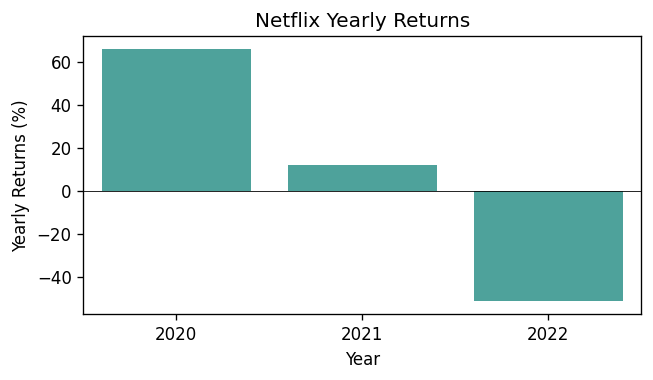

In [15]:
# Visualize yearly percent returns
plt.figure(figsize=(6,3), dpi=120)
axplot2 = sns.barplot(x='Year', y='Yearly Pct Change', data=netflix_yearly_returns, ci=False, color='#40B0A6')
axplot2.set(title="Netflix Yearly Returns", xlabel="Year", ylabel="Yearly Returns (%)")
axplot2.axhline(0, color='black', linewidth=0.5)
plt.show()

In 2020, Netflix stock opened at \\$326.10 and closed the year at \\$540.73 corresponding to a +65.8% gain which was the highest return in this trading period.

In 2021, the stock opened at \\$539.00 (the slight difference from last year's closing price is due to after-market/pre-market trading) and ended the year at \\$602.44 resulting in a +11.8% gain.

In 2022, Netflix had its worse performing year with a -51.3% drop from an opening price of \\$605.61 to a closing price of \\$294.88. Again, this was most likely due to Netflix reporting that it lost subscribers for the first time in over a decade. 

The three years of data from 2019 to 2021 are not enough for us to draw meaningful conclusions about Netflix's yearly returns. Ideally, we'd need more data to draw a more fruitful analysis to see how Netflix's stock performance has been affected in the long term. This might involve including the full historical data starting from when Netflix IPO'd so we'd be able to analyze its yearly price trends throughout the global pandemic, the rise of other streaming competitors, and during the decade-long bull market sparked primarily by tech stocks. 

### How often did Netflix exceed their EPS estimates when they reported earnings?

Earnings Per Share (EPS) is a fundamental metric that measures the profitability of a company by representing the portion of the company's profit to each outstanding share of its common stock. It is commonly used by investors and financial institutions to assess a company's financial health, evaluate their stock, and make investment decisions in conjunction with other metrics. 

EPS and other metrics are reported by companies during their reported earnings. Higher EPS is generally viewed positively, however, financial analysts already have an estimate of expected EPS numbers. So it is more common to compare a company's estimated EPS to their actual reported EPS before making an investment decision. 

Let's now plot Netflix's reported estimated vs actual EPS numbers from 2020 to 2022. 

In [16]:
# Load Netflix EPS data
nflx_eps = pd.read_csv('datasets/NFLX_eps_history.csv')
nflx_eps

,Date,Estimated,Actual
0,2020-01-21,$0.52,$1.30
1,2020-04-21,$1.61,$1.57
2,2020-07-16,$1.84,$1.59
3,2020-10-20,$2.13,$1.74
4,2021-01-19,$1.38,$1.19
5,2021-04-20,$2.98,$3.75
6,2021-07-20,$3.16,$2.97
7,2021-10-19,$2.56,$3.19
8,2022-01-20,$0.82,$1.33
9,2022-04-19,$2.92,$3.53


Now let's clean up the EPS data.

In [17]:
# Remove dollar signs and convert to floats
nflx_eps['Estimated'] = nflx_eps['Estimated'].str.replace('$', '', regex=False).astype(float)
nflx_eps['Actual'] = nflx_eps['Actual'].str.replace('$', '', regex=False).astype(float)

# Calculate percent difference 
nflx_eps['Pct Diff'] = (nflx_eps['Actual'] - nflx_eps['Estimated']) / nflx_eps['Estimated'] * 100
nflx_eps

,Date,Estimated,Actual,Pct Diff
0,2020-01-21,0.52,1.30,150.000000
1,2020-04-21,1.61,1.57,-2.484472
2,2020-07-16,1.84,1.59,-13.586957
3,2020-10-20,2.13,1.74,-18.309859
4,2021-01-19,1.38,1.19,-13.768116
5,2021-04-20,2.98,3.75,25.838926
6,2021-07-20,3.16,2.97,-6.012658
7,2021-10-19,2.56,3.19,24.609375
8,2022-01-20,0.82,1.33,62.195122
9,2022-04-19,2.92,3.53,20.890411


Let's also standardize the reported earnings date **by quarter** to give us consistency when analyzing historical patterns.

In [18]:
nflx_eps = get_year_month(nflx_eps)
nflx_eps['Quarter'] = nflx_eps['Month'].str.replace('01', 'Q1')\
                                       .str.replace('04', 'Q2')\
                                       .str.replace('07', 'Q3')\
                                       .str.replace('10', 'Q4')

nflx_eps['Quarter-Year'] = nflx_eps['Quarter'].str.cat(nflx_eps['Year'], sep='-')
nflx_eps

,Date,Estimated,Actual,Pct Diff,Year,Month,Month-Year,Quarter,Quarter-Year
0,2020-01-21,0.52,1.30,150.000000,2020,01,01-2020,Q1,Q1-2020
1,2020-04-21,1.61,1.57,-2.484472,2020,04,04-2020,Q2,Q2-2020
2,2020-07-16,1.84,1.59,-13.586957,2020,07,07-2020,Q3,Q3-2020
3,2020-10-20,2.13,1.74,-18.309859,2020,10,10-2020,Q4,Q4-2020
4,2021-01-19,1.38,1.19,-13.768116,2021,01,01-2021,Q1,Q1-2021
5,2021-04-20,2.98,3.75,25.838926,2021,04,04-2021,Q2,Q2-2021
6,2021-07-20,3.16,2.97,-6.012658,2021,07,07-2021,Q3,Q3-2021
7,2021-10-19,2.56,3.19,24.609375,2021,10,10-2021,Q4,Q4-2021
8,2022-01-20,0.82,1.33,62.195122,2022,01,01-2022,Q1,Q1-2022
9,2022-04-19,2.92,3.53,20.890411,2022,04,04-2022,Q2,Q2-2022


We'll compare the historical estimated vs. actual EPS numbers reported using a side-by-side bar chart.

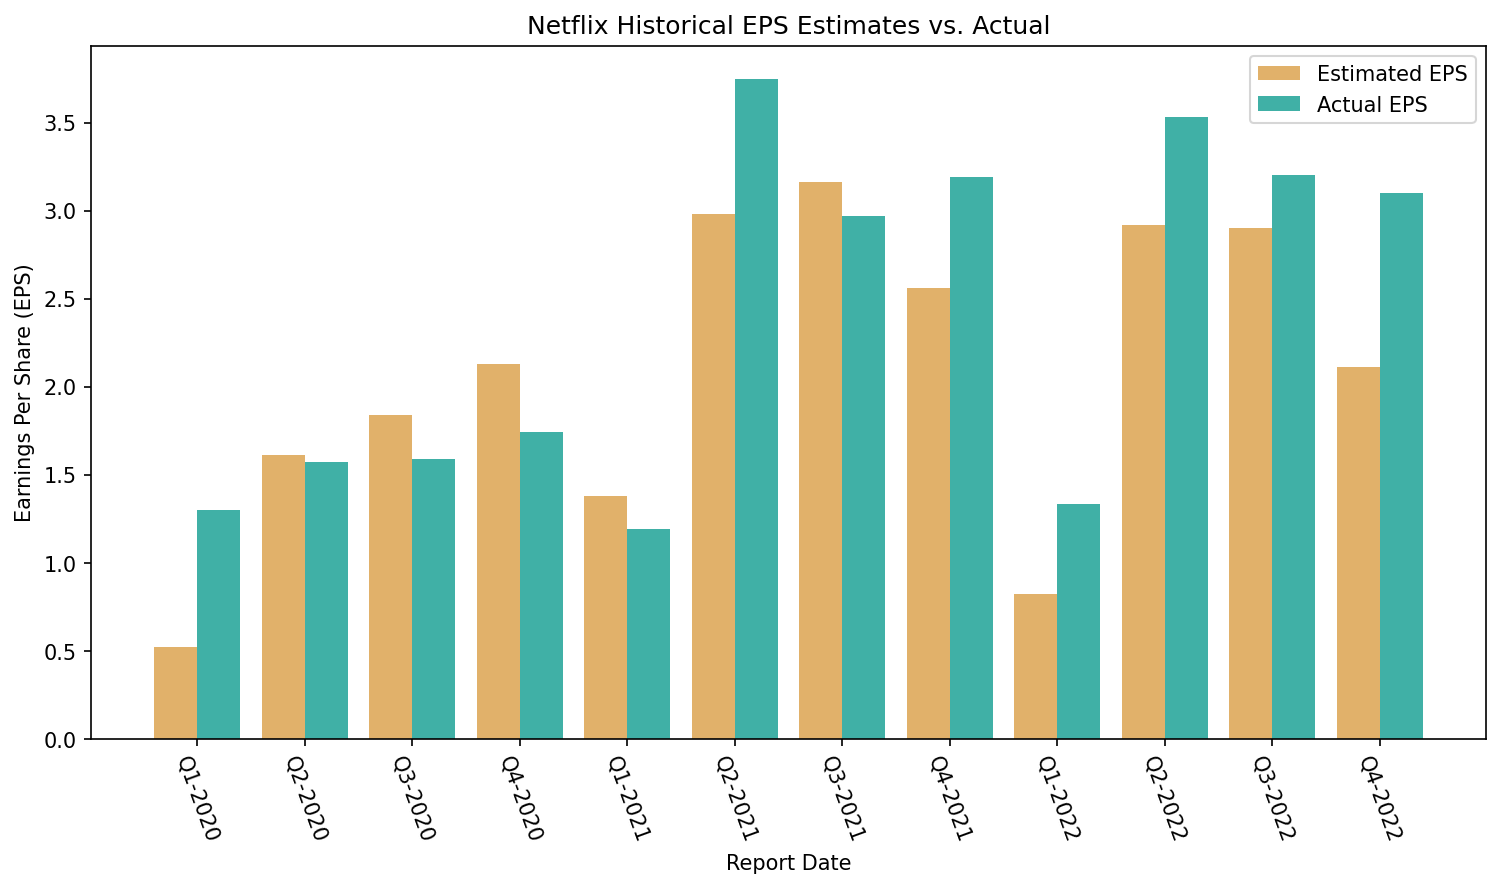

In [19]:
plt.figure(figsize=(12,6), dpi=150)
bar_width = 0.4
plt.bar(nflx_eps.index, nflx_eps['Estimated'], width=bar_width, label='Estimated EPS', color='#E1B16A')
plt.bar(nflx_eps.index + bar_width, nflx_eps['Actual'], width=bar_width, label='Actual EPS', color='#40B0A6')

plt.title('Netflix Historical EPS Estimates vs. Actual')
plt.xlabel('Report Date')
plt.ylabel('Earnings Per Share (EPS)')
plt.xticks(nflx_eps.index + bar_width / 2, nflx_eps['Quarter-Year'].astype(str), rotation=-70)
plt.legend()
plt.show()

Let's also plot the percent difference between the estimated vs. actual EPS numbers as well.

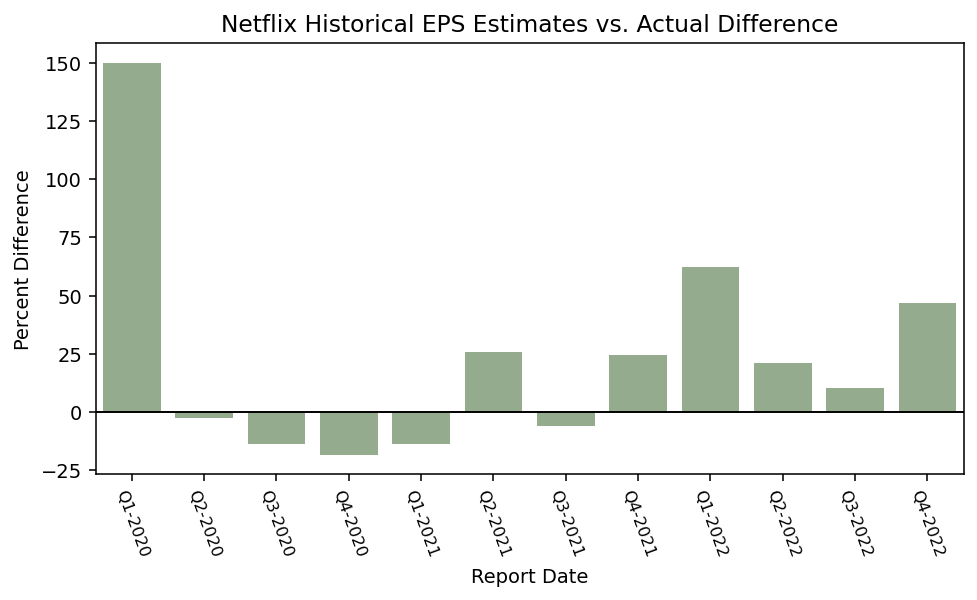

In [20]:
plt.figure(figsize=(8,4), dpi=140)
axplot3 = sns.barplot(x=nflx_eps['Quarter-Year'], y=nflx_eps['Pct Diff'], color='#91B188')
axplot3.set(title="Netflix Historical EPS Estimates vs. Actual Difference", xlabel="Report Date", ylabel="Percent Difference")
axplot3.axhline(0, linewidth=1.0, color='black')
plt.tick_params(axis='x', labelsize='small', labelrotation=-70)
plt.show()

Looking at the estimates vs actual EPS charts, we see that both the estimated and actual EPS numbers vary inconsistently throughout the years. 

However, we do see some notable trends:
- Within each year, it looks like Q1 has the lowest EPS estimates and actual numbers
- Q1-2020 was Netflix's best reported EPS where they beat estimates by \\$0.78 (150%) 
- This was followed by 4 straight quarterly misses from Q2-2020 to Q1-2021 (perhaps a foreshadowing of the -50% drop later)
- Netflix beat estimates in the last 5 quarterly EPS reports (perhaps a sign that Netflix stock will rebound in the future)

It is important to note that the estimates calculated by financial analysts are not always accurate. As we can visually see, there are no estimates that perfectly predict the actual EPS numbers Netflix has reported which highlights the difficulty in reliably assessing a company's financial health and stock evaluations.

### Were there any similar trends between the movement of Netflix's stock price and any of the major US stock indices such as the Dow Jones Industrial Average, S&P 500 Index, or Nasdaq Composite?

Let's now examine the relationship between Netflix's stock price and the three major US stock indices: the Dow Jones Industrial Average, S&P 500, and Nasdaq Composite. Specifically, we'll visualize their price movements and compare their similarities or disparities to discern whether or not Netflix's performance correlates with the broader market.

In [21]:
# Load Monthly data for Netflix, Dow Jones, S&P 500, and Nasdaq 
nflx_monthly = pd.read_csv('datasets/NFLX_monthly_prices.csv')
dow_monthly = pd.read_csv('datasets/DJI_monthly_prices.csv')
sp500_monthly  = pd.read_csv('datasets/SP500_monthly_prices.csv')
nasdaq_monthly = pd.read_csv('datasets/NASDAQ_monthly_prices.csv')

In [22]:
dow_monthly.head()

,Date,Open,High,Low,Close,Monthly Pct Return
0,2020-01-31,28638.970703,29373.619141,28169.529297,28256.029297,-0.989578
1,2020-02-29,28319.650391,29568.570312,24681.009766,25409.359375,-10.074558
2,2020-03-31,25590.509766,27102.339844,18213.650391,21917.160156,-13.743752
3,2020-04-30,21227.380859,24764.769531,20735.019531,24345.720703,11.080635
4,2020-05-31,24120.779297,25758.789062,22789.619141,25383.109375,4.261072


We'll clean and pre-process the datasets using the functions we created earlier.

In [23]:
# Data Cleaning and Pre-Processing
nflx_monthly = clean_stock_data(nflx_monthly)
dow_monthly = clean_stock_data(dow_monthly)
sp500_monthly = clean_stock_data(sp500_monthly)
nasdaq_monthly = clean_stock_data(nasdaq_monthly)

nflx_monthly = get_year_month(nflx_monthly)
dow_monthly = get_year_month(dow_monthly)
sp500_monthly = get_year_month(sp500_monthly)
nasdaq_monthly = get_year_month(nasdaq_monthly)

Now let's plot the monthly closing price for Netflix and each major index together.

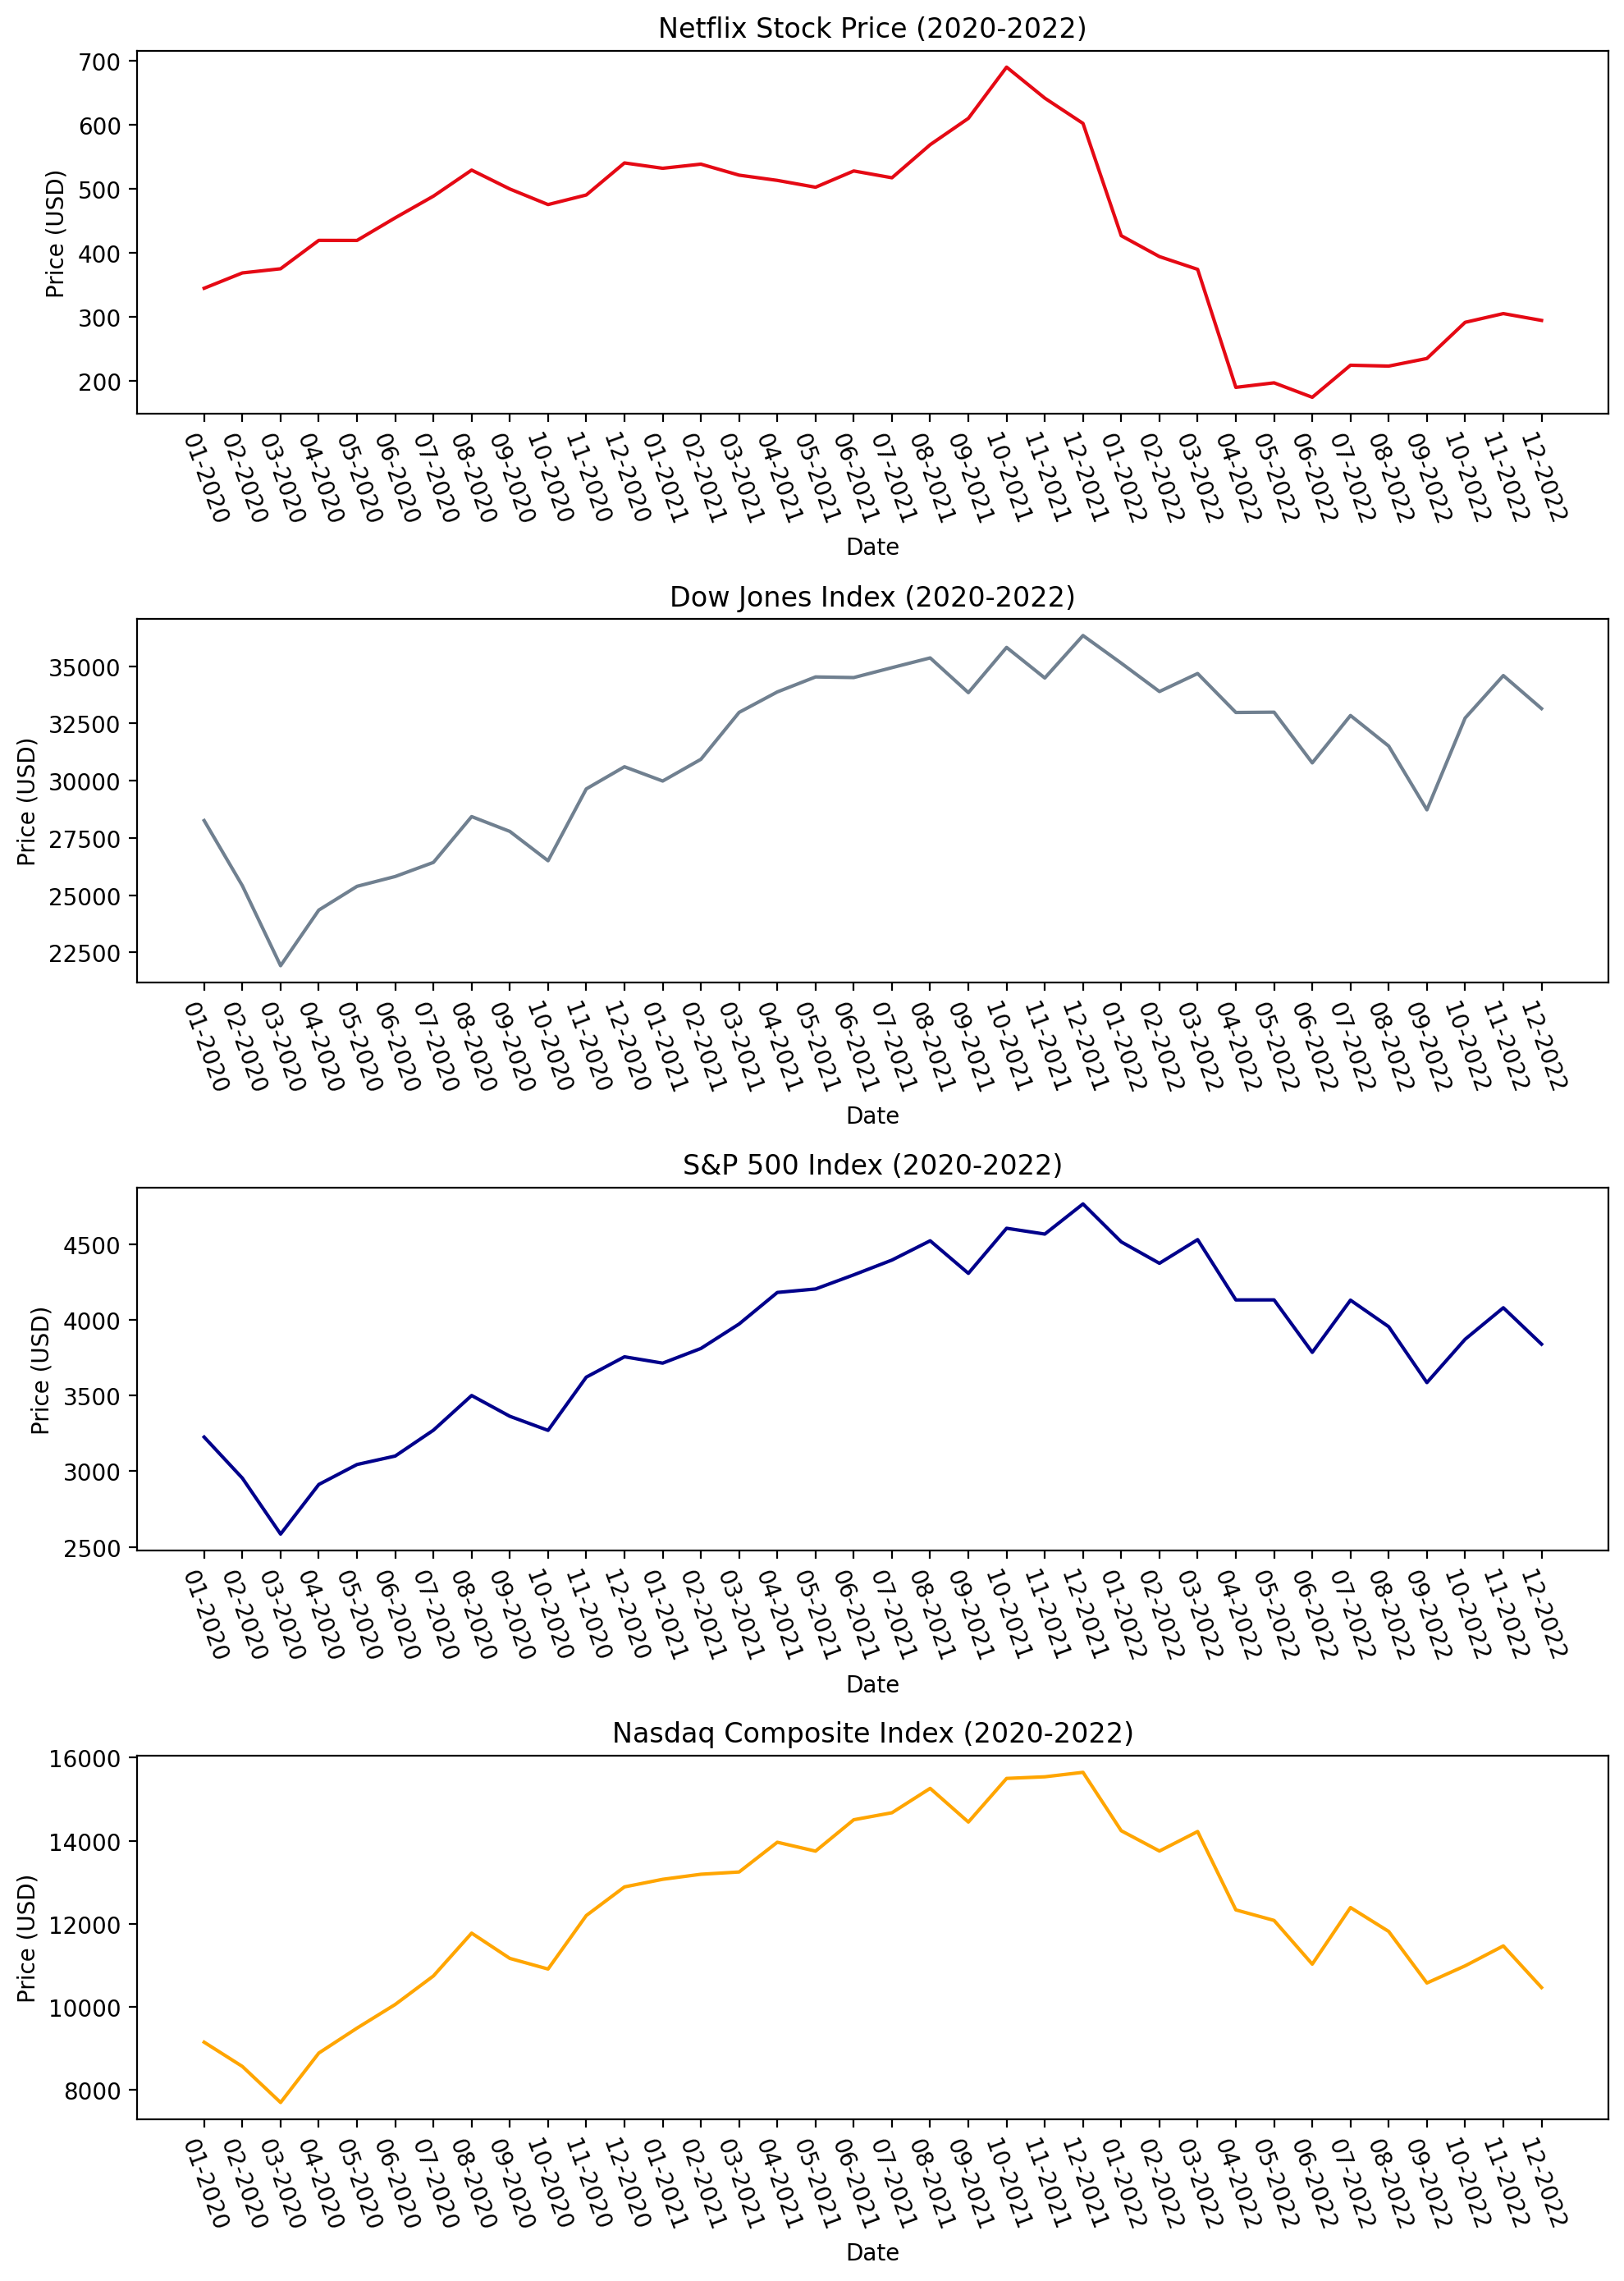

In [24]:
plt.figure(figsize=(10, 14), tight_layout=True, dpi=200)

ax1 = plt.subplot(4, 1, 1)
sns.lineplot(data=nflx_monthly, x='Month-Year', y='Price', color="#E50914") # Netflix Red
ax1.set(title="Netflix Stock Price (2020-2022)", xlabel="Date", ylabel="Price (USD)")
ax1.tick_params(axis='x', labelrotation=-70)

ax2 = plt.subplot(4, 1, 2)
sns.lineplot(data=dow_monthly, x='Month-Year', y='Price', color="slategray")
ax2.set(title="Dow Jones Index (2020-2022)", xlabel="Date", ylabel="Price (USD)")
ax2.tick_params(axis='x', labelrotation=-70)

ax3 = plt.subplot(4, 1, 3)
sns.lineplot(data=sp500_monthly, x='Month-Year', y='Price', color="darkblue")
ax3.set(title="S&P 500 Index (2020-2022)", xlabel="Date", ylabel="Price (USD)")
ax3.tick_params(axis='x', labelrotation=-70)

ax4 = plt.subplot(4, 1, 4)
sns.lineplot(data=nasdaq_monthly, x='Month-Year', y='Price', color="orange")
ax4.set(title="Nasdaq Composite Index (2020-2022)", xlabel="Date", ylabel="Price (USD)")
ax4.tick_params(axis='x', labelrotation=-70)

plt.show()

Based on the visualizations of monthly prices, we see that the movement of Netflix stock is *generally* similar to the three major indices although there are some notable deviations. 

We see that in the first three months (from January 2020 to March 2020), the three major indices declined in tandem whereas Netflix stock increased in the same trading period. Afterward, they all notably exhibited a bullish upward trend until the end of 2021. Interestingly, it looks like Netflix stock peaked first in October 2021 with the major indices having their peaks in the following months. Perhaps Netflix was a leading indicator during this particular trading period. 

Following the bullish peaks at the end of 2021, it seems that Netflix and all three indices followed a bearish downward trend throughout 2022. Interestingly, it looks like Netflix exhibited much higher volatility and declined faster than the major indices. Netflix's bearish decline also seemed to correlate more with the Nasdaq Composite than the Dow Jones and S&P 500 indices which makes more sense since many financial analysts believe the Nasdaq Composite is a more tech-heavy index. We'd need to do more statistical analysis to know if this visual correlation holds numerically.

These relationships suggest that Netflix *generally* moves similarly to the three major indices. However, we also see trading periods where Netflix deviated heavily which might be due to other market factors specific to their company or industry. It might be interesting to investigate more into whether Netflix is a leading indicator of the broader market movements. 

### How can we identify potential trading opportunities by comparing the prices of Netflix's stock to its competitors, such as Disney and Spotify? 

Oftentimes, investors and traders will compare two related companies that have correlated stock prices -- prices that move consistently with one another. This trading strategy is known as *pairs trading*, where the idea is to make a profit by looking for price divergences between the two stocks and taking advantage of their predicted convergence, or vice-versa. 

In this case, we'll compare the stock prices between Netflix and two related companies, Disney and Spotify, using their **price ratios** to measure convergences and divergences. We'll visualize the price ratios along with their mean and standard deviations to identify periods of potential *mean reversions* (periods where the ratio returns to the average value).

First, let's load the CSV files containing the monthly stock prices for Disney and Spotify.

In [25]:
nflx_monthly = pd.read_csv('datasets/NFLX_monthly_prices.csv') # Re-load $NFLX
dis_monthly = pd.read_csv('datasets/DIS_monthly_prices.csv') # Load $DIS 
spot_monthly = pd.read_csv('datasets/SPOT_monthly_prices.csv') # Load $SPOT

In [26]:
dis_monthly.head()

,Date,Open,High,Low,Close,Monthly Pct Return
0,2020-01-31,145.289993,148.199997,134.830002,138.309998,-4.369776
1,2020-02-29,139.789993,147.300003,113.209999,117.650002,-14.937457
2,2020-03-31,119.129997,121.779999,79.070000,96.599998,-17.892055
3,2020-04-30,93.500000,112.699997,92.559998,108.150002,11.956525
4,2020-05-31,106.360001,123.779999,98.860001,117.300003,8.460473


In [27]:
# Convert Date to datetime data types
nflx_monthly['Date'] = nflx_monthly['Date'].astype('datetime64')
dis_monthly['Date'] = dis_monthly['Date'].astype('datetime64')
spot_monthly['Date'] = spot_monthly['Date'].astype('datetime64')

Let's calculate the price ratio for Netflix and Disney stock using their closing prices. We'll also compute the mean and standard deviation for the price ratio as well.

In [28]:
nflx_monthly['DIS_ratio'] = nflx_monthly['Close'] / dis_monthly['Close']

nflx_dis_mean_ratio = nflx_monthly['DIS_ratio'].mean()
nflx_dis_std_ratio = nflx_monthly['DIS_ratio'].std()

print("Netflix/Disney Price Ratio Mean: ", nflx_dis_mean_ratio)
print("Netflix/Disney Price Ratio Standard Deviation: ", nflx_dis_std_ratio)

Netflix/Disney Price Ratio Mean:  3.1280680132135874
Netflix/Disney Price Ratio Standard Deviation:  0.7308112840194719


Using the mean and standard deviations of the price ratios, let's create the upper bound (+1 standard deviation from the mean) and lower bound (-1 standard deviation from the mean).

In [29]:
# Calculate upper and lower boundaries for standard deviation lines
nflx_dis_upper_bound = nflx_dis_mean_ratio + nflx_dis_std_ratio
nflx_dis_lower_bound = nflx_dis_mean_ratio - nflx_dis_std_ratio

Finally, let's visualize Netflix's and Disney's stock price along with their price ratios over time. We'll also identify areas where the price ratio will potentially mean revert. 

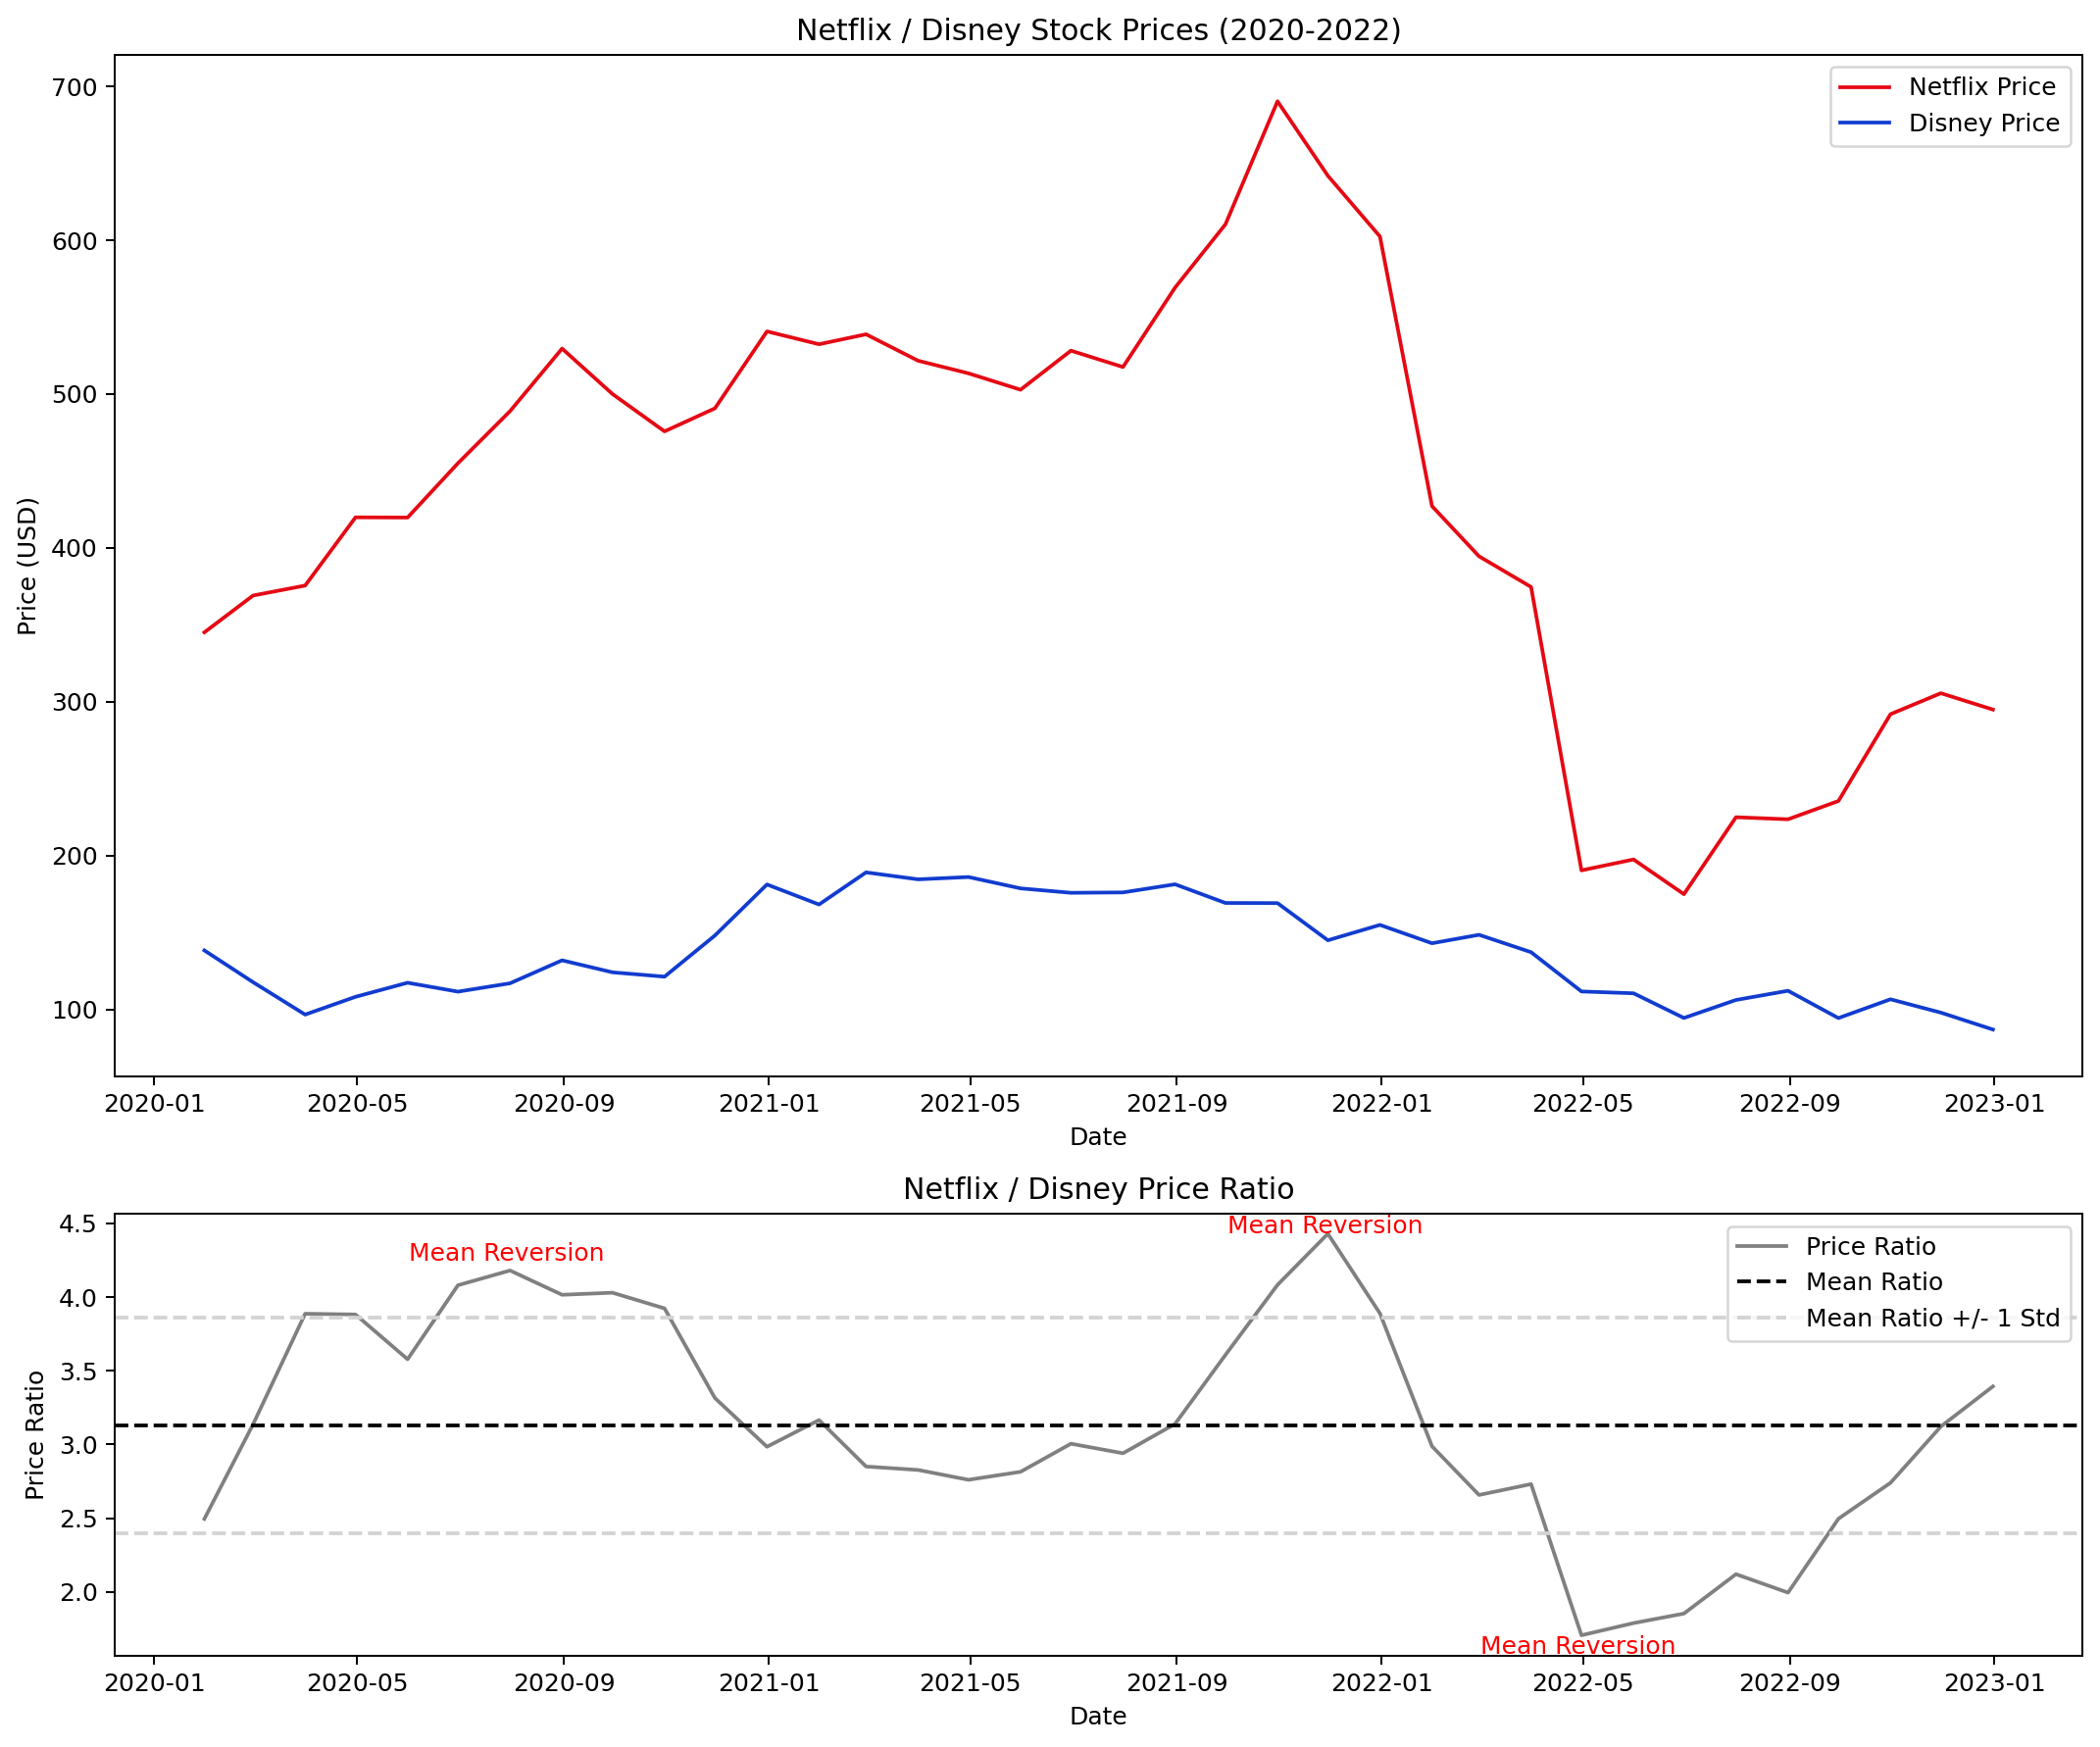

In [30]:
plt.figure(figsize=(12, 10), tight_layout=True, dpi=180)
ax1 = plt.subplot(3, 1, (1,2))
sns.lineplot(data=nflx_monthly, x='Date', y='Close', label='Netflix Price', color='#E50914') # Netflix Red
sns.lineplot(data=dis_monthly, x='Date', y='Close', label='Disney Price', color='#113CCF') # Disney Blue
ax1.set(title="Netflix / Disney Stock Prices (2020-2022)", xlabel="Date", ylabel="Price (USD)")

# Plot the price ratio with standard deviation lines
ax2 = plt.subplot(3, 1, 3)
sns.lineplot(data=nflx_monthly, x='Date', y='DIS_ratio', label='Price Ratio', color='gray')
ax2.axhline(nflx_dis_mean_ratio, linestyle='--', label='Mean Ratio', color='black')
ax2.axhline(nflx_dis_upper_bound, linestyle='--', label='Mean Ratio +/- 1 Std', color='lightgray')
ax2.axhline(nflx_dis_lower_bound, linestyle='--', color='lightgray')
ax2.set(title="Netflix / Disney Price Ratio", xlabel="Date", ylabel="Price Ratio")

# Annotate mean reversion signals
ax2.annotate('Mean Reversion', xy=(pd.to_datetime('2020-06-01'), 4.25), color='red')
ax2.annotate('Mean Reversion', xy=(pd.to_datetime('2021-10-01'), 4.43), color='red')
ax2.annotate('Mean Reversion', xy=(pd.to_datetime('2022-03-01'), 1.58), color='red')

plt.legend()
plt.show()

We see that from 2020 to 2022, Netflix stock price has been trading at about 3.13 times that of Disney stock with a standard deviation of about 0.73. 

Interestingly, we see three areas where the price ratio reached over +/- 1 standard deviations from the mean and reverted back to the mean price ratio every time.

Looking at the last stock prices in our dataset, we see that the current price ratio is near the mean which might suggest a higher level of uncertainty about where the price ratio will deviate in the future. The price ratio could fluctuate back up, down, or remain relatively the same. 

Now, let's do the same for Netflix and Spotify.

In [31]:
nflx_monthly['SPOT_ratio'] = nflx_monthly['Close'] / spot_monthly['Close']

nflx_spot_mean_ratio = nflx_monthly['SPOT_ratio'].mean()
nflx_spot_std_ratio = nflx_monthly['SPOT_ratio'].std()

# Calculate upper and lower boundaries for standard deviation lines
nflx_spot_upper_bound = nflx_spot_mean_ratio + nflx_spot_std_ratio
nflx_spot_lower_bound = nflx_spot_mean_ratio - nflx_spot_std_ratio

print("Netflix/Spotify Price Ratio Mean: ", nflx_spot_mean_ratio)
print("Netflix/Spotify Price Ratio Standard Deviation: ", nflx_spot_std_ratio)

Netflix/Spotify Price Ratio Mean:  2.317607041740418
Netflix/Spotify Price Ratio Standard Deviation:  0.5683363301424523


Lastly, let's visualize Netflix's and Spotify's stock price along with their price ratios over time. We'll also identify areas where the price ratio will potentially mean revert. 

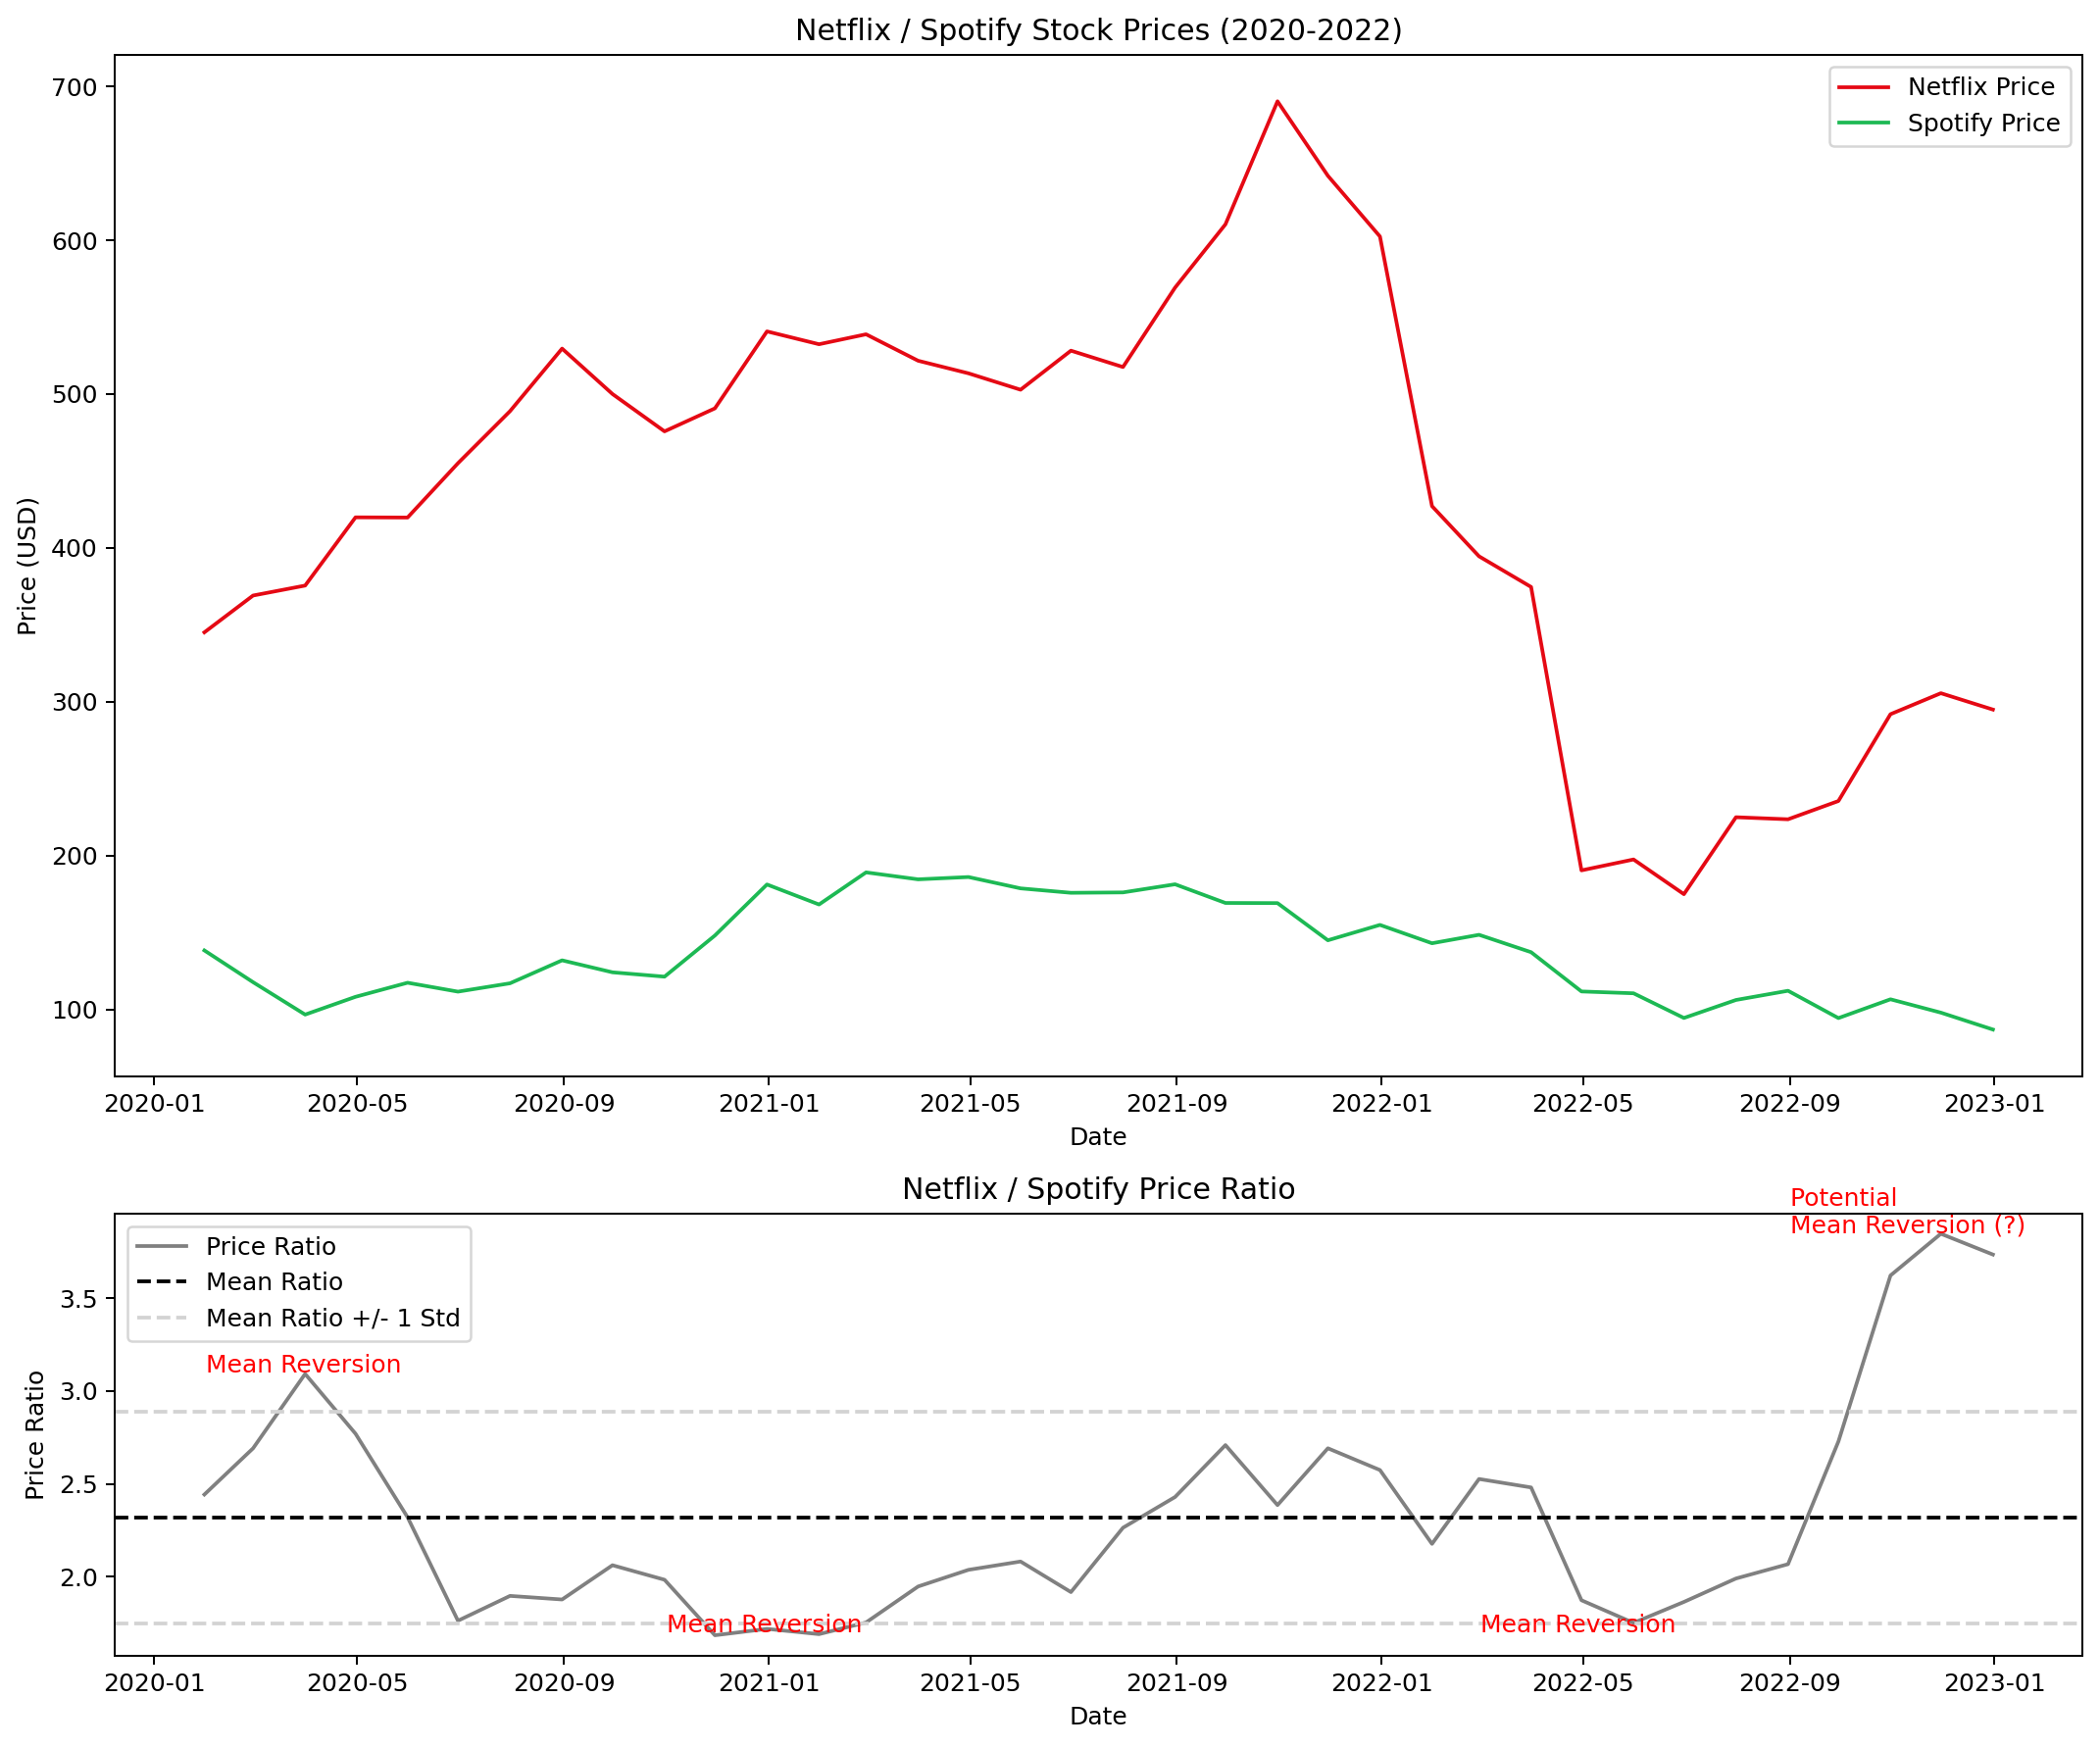

In [32]:
plt.figure(figsize=(12, 10), tight_layout=True, dpi=180)
ax1 = plt.subplot(3, 1, (1,2))
sns.lineplot(data=nflx_monthly, x='Date', y='Close', label='Netflix Price', color='#E50914') # Netflix Red
sns.lineplot(data=dis_monthly, x='Date', y='Close', label='Spotify Price', color='#1DB954') # Spotify Green
ax1.set(title="Netflix / Spotify Stock Prices (2020-2022)", xlabel="Date", ylabel="Price (USD)")

# Plot the price ratio with standard deviation lines
ax2 = plt.subplot(3, 1, 3)
sns.lineplot(data=nflx_monthly, x='Date', y='SPOT_ratio', label='Price Ratio', color='gray')
ax2.axhline(nflx_spot_mean_ratio, linestyle='--', label='Mean Ratio', color='black')
ax2.axhline(nflx_spot_upper_bound, linestyle='--', label='Mean Ratio +/- 1 Std', color='lightgray')
ax2.axhline(nflx_spot_lower_bound, linestyle='--', color='lightgray')
ax2.set(title="Netflix / Spotify Price Ratio", xlabel="Date", ylabel="Price Ratio")

# Annotate mean reversion signals
ax2.annotate('Mean Reversion', xy=(pd.to_datetime('2020-02-01'), 3.1), color='red')
ax2.annotate('Mean Reversion', xy=(pd.to_datetime('2020-11-01'), 1.7), color='red')
ax2.annotate('Mean Reversion', xy=(pd.to_datetime('2022-03-01'), 1.7), color='red')
ax2.annotate('Potential \nMean Reversion (?)', xy=(pd.to_datetime('2022-09-01'), 3.85), color='red')

plt.legend()
plt.show()

We see that from 2020 to 2022, Netflix's stock price has been trading at about 2.32 times that of Spotify stock with a standard deviation of about 0.57. 

There are four areas where the price ratio reached over +/- 1 standard deviations from the mean and reverted back to the mean price ratio every time. However, we do see the second area where the price ratio remained near 1 standard deviation below the mean from June 2020 to March 2021 before eventually reverting back to the mean.

Interestingly, we see that the current price ratio is significantly higher than the mean price ratio (about +2 standard deviations!). This could be a potential trading opportunity to initiate a pairs trade that would profit off the convergence of the price ratio back to the mean.

However, it's important to note that trading decisions should not be based solely be based on price ratios, and this project is not financial advice. Investors and traders should try to understand why the price ratios deviated and consider conducting further analysis like the current market trends, fundamental factors, and other technical indicators to make well-informed investment decisions.